In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'C:\Users\Vasilis\Downloads\Financial\Largest companies in world.csv')

In [5]:
df.head()

,rank,organizationName,country,revenue,profits,assets,marketValue
0,1,JPMorgan Chase,United States,179.93 B,41.8 B,"3,744.3 B",399.59 B
1,2,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,589.47 B,156.36 B,660.99 B,"2,055.22 B"
2,3,ICBC,China,216.77 B,52.47 B,"6,116.82 B",203.01 B
3,4,China Construction Bank,China,203.08 B,48.25 B,"4,977.48 B",172.99 B
4,5,Agricultural Bank of China,China,186.14 B,37.92 B,"5,356.86 B",141.82 B


In [11]:
def convert_to_number(value):
    value = str(value).replace(',', '').strip()

    if 'B' in value:
        return float(value.replace('B', ''))
    elif 'M' in value:
        return float(value.replace('M', '')) / 1000

In [15]:
df['revenue'] = df['revenue'].apply(convert_to_number)
df['profits'] = df['profits'].apply(convert_to_number)
df['assets'] = df['assets'].apply(convert_to_number)
df['marketValue'] = df['marketValue'].apply(convert_to_number)

In [23]:
df.shape

(2050, 7)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2050 entries, 0 to 2049
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rank              2050 non-null   int64  
 1   organizationName  2050 non-null   object 
 2   country           2050 non-null   object 
 3   revenue           2049 non-null   float64
 4   profits           2049 non-null   float64
 5   assets            2049 non-null   float64
 6   marketValue       2049 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 112.2+ KB


In [29]:
df.describe()

,rank,revenue,profits,assets,marketValue
count,2050.000000,2049.000000,2049.000000,2049.000000,2049.000000
mean,1025.500000,29.686214,2.815608,143.333267,45.351000
std,591.928346,57.608995,8.605039,468.096872,152.303896
min,1.000000,-109.990000,-76.170000,0.105000,0.032000
25%,513.250000,5.900000,0.501900,15.020000,6.970000
50%,1025.500000,12.760000,0.989800,33.330000,15.880000
75%,1537.750000,26.950000,2.360000,83.070000,35.890000
max,2050.000000,611.290000,156.360000,6116.820000,2746.210000


In [33]:
df.isnull().sum()

rank                0
organizationName    0
country             0
revenue             1
profits             1
assets              1
marketValue         1
dtype: int64

In [35]:
df

,rank,organizationName,country,revenue,profits,assets,marketValue
0,1,JPMorgan Chase,United States,179.930,41.8000,3744.30,399.59
1,2,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,589.470,156.3600,660.99,2055.22
2,3,ICBC,China,216.770,52.4700,6116.82,203.01
3,4,China Construction Bank,China,203.080,48.2500,4977.48,172.99
4,5,Agricultural Bank of China,China,186.140,37.9200,5356.86,141.82
...,...,...,...,...,...,...,...
2045,2046,Alfa Laval,Sweden,15.620,-0.2020,11.39,3.17
2046,2047,Gap,United States,3.340,0.0916,43.22,5.60
2047,2048,Yes Bank,India,0.556,0.1671,42.97,2.49
2048,2049,BEKB-BCBE,Switzerland,3.180,0.6817,5.99,10.21


In [39]:
df.loc[2049] = df.loc[2049].fillna({'revenue': 3.128 , 'profits':0.647 , 'assets': 4.5, 'marketValue': 8.75})

In [41]:
df.isnull().sum()

rank                0
organizationName    0
country             0
revenue             0
profits             0
assets              0
marketValue         0
dtype: int64

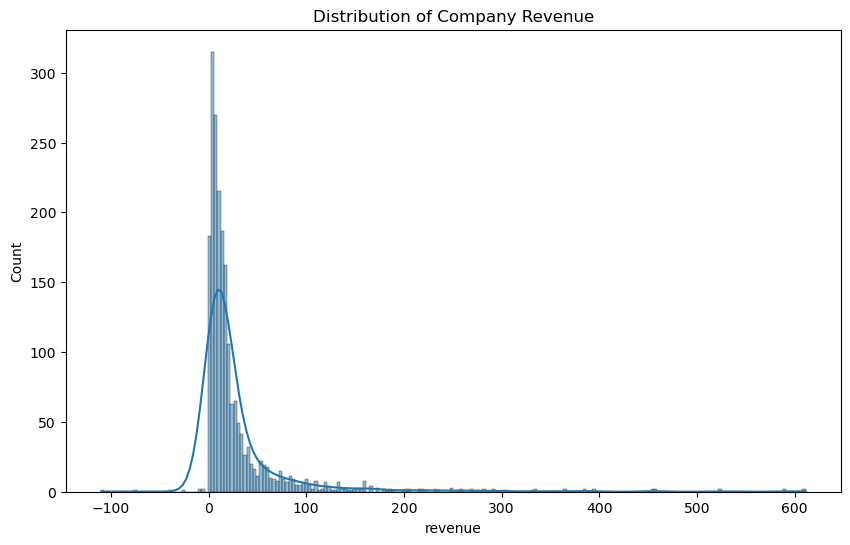

In [43]:
plt.figure(figsize = (10, 6))
sns.histplot(df['revenue'], kde= True)
plt.title('Distribution of Company Revenue')
plt.show()

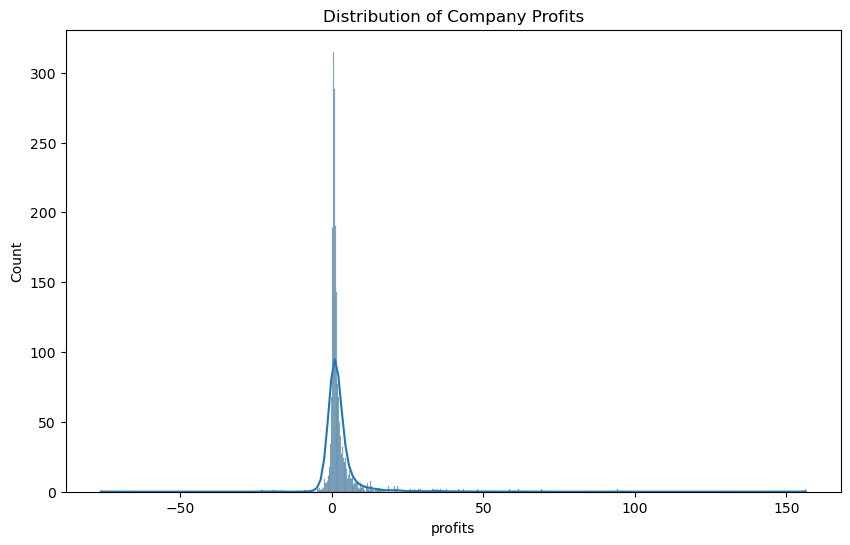

In [47]:
plt.figure(figsize = (10, 6))
sns.histplot(df['profits'], kde = True)
plt.title('Distribution of Company Profits')
plt.show()

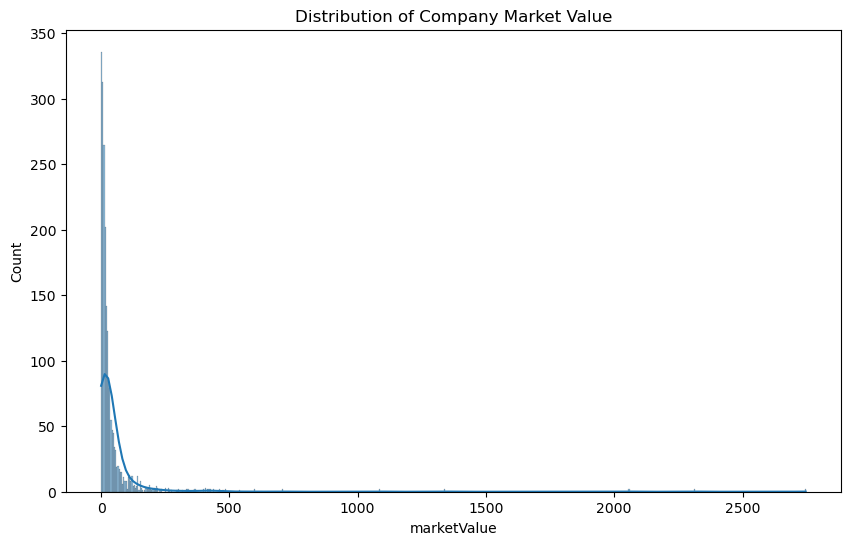

In [49]:
plt.figure(figsize = (10, 6))
sns.histplot(df['marketValue'], kde = True)
plt.title('Distribution of Company Market Value')
plt.show()

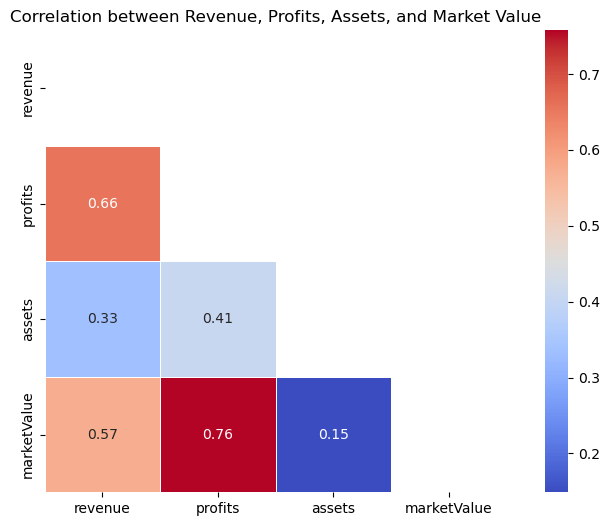

In [65]:
corr = df[['revenue', 'profits', 'assets', 'marketValue']].corr()

mask = np.triu(np.ones_like(corr, dtype = bool))

plt.figure(figsize = (10, 6))
sns.heatmap(corr, annot = True, cmap ='coolwarm', mask = mask, square = True, linewidths = 0.5)
plt.title('Correlation between Revenue, Profits, Assets, and Market Value')
plt.show()

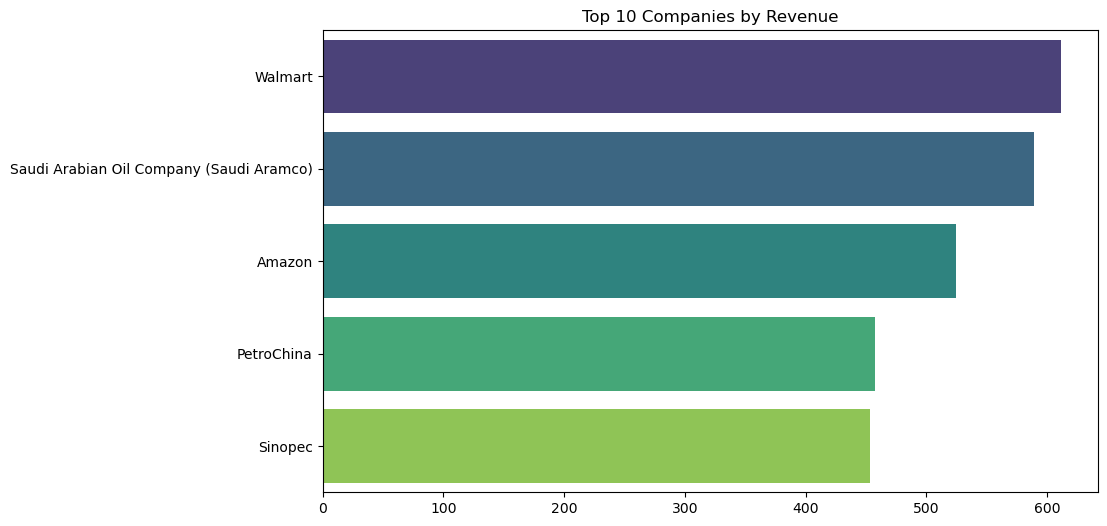

In [77]:
top_companies_by_revenue = df.sort_values(by = 'revenue', ascending = False).head(10)

plt.figure(figsize = (10, 6))
sns.barplot(x = 'revenue', y = 'organizationName', data = top_companies_by_revenue, palette = 'viridis', hue = 'organizationName', legend = False)
plt.title('Top 10 Companies by Revenue')
plt.xlabel('')
plt.ylabel('')
plt.show()

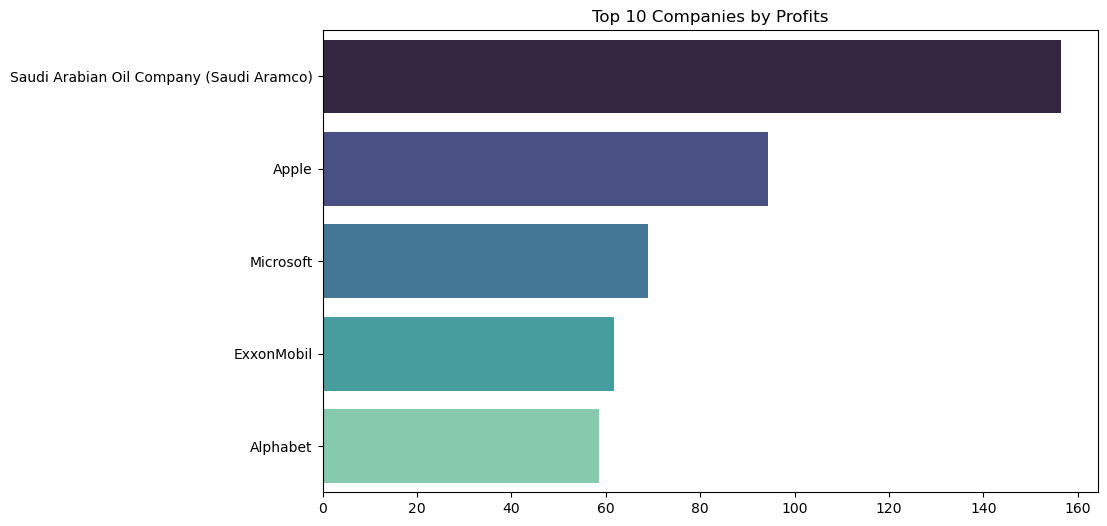

In [99]:
top_companies_by_profit = df.sort_values(by ='profits', ascending = False).head(10)

plt.figure(figsize = (10, 6))
sns.barplot( x = 'profits', y = 'organizationName', data = top_companies_by_profit, palette = 'mako', hue = 'organizationName', legend =False)
plt.title('Top 10 Companies by Profits')
plt.xlabel('')
plt.ylabel('')
plt.show()

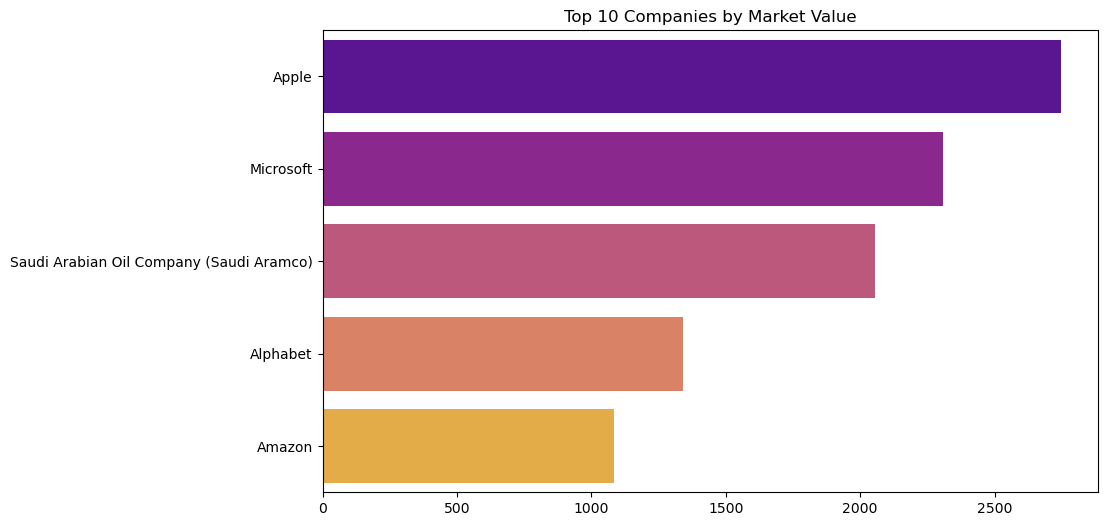

In [81]:
top_companies_by_market_value = df.sort_values(by = 'marketValue', ascending = False).head(10)

plt.figure(figsize = (10, 6))
sns.barplot(x = 'marketValue', y = 'organizationName', data = top_companies_by_market_value, palette = 'plasma', hue = 'organizationName', legend = False)
plt.title('Top 10 Companies by Market Value')
plt.xlabel('')
plt.ylabel('')
plt.show()

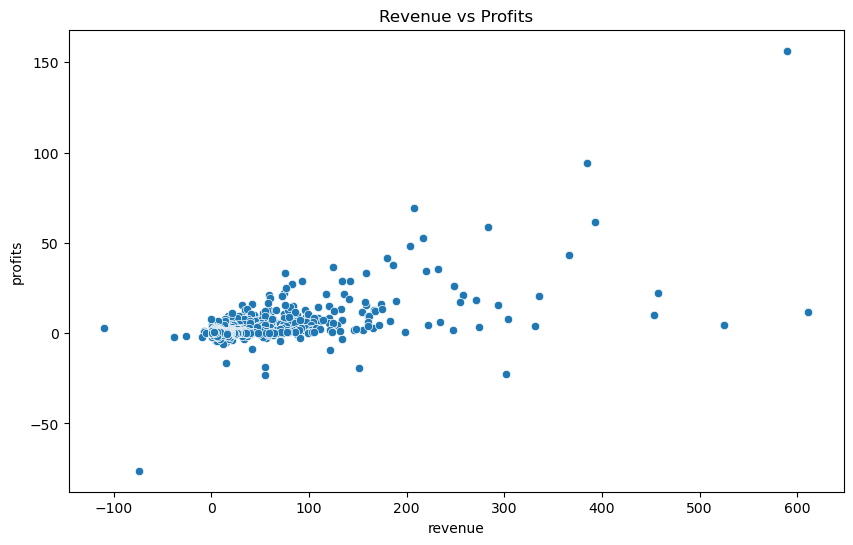

In [97]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'revenue', y = 'profits', data = df)
plt.title('Revenue vs Profits')
plt.show()

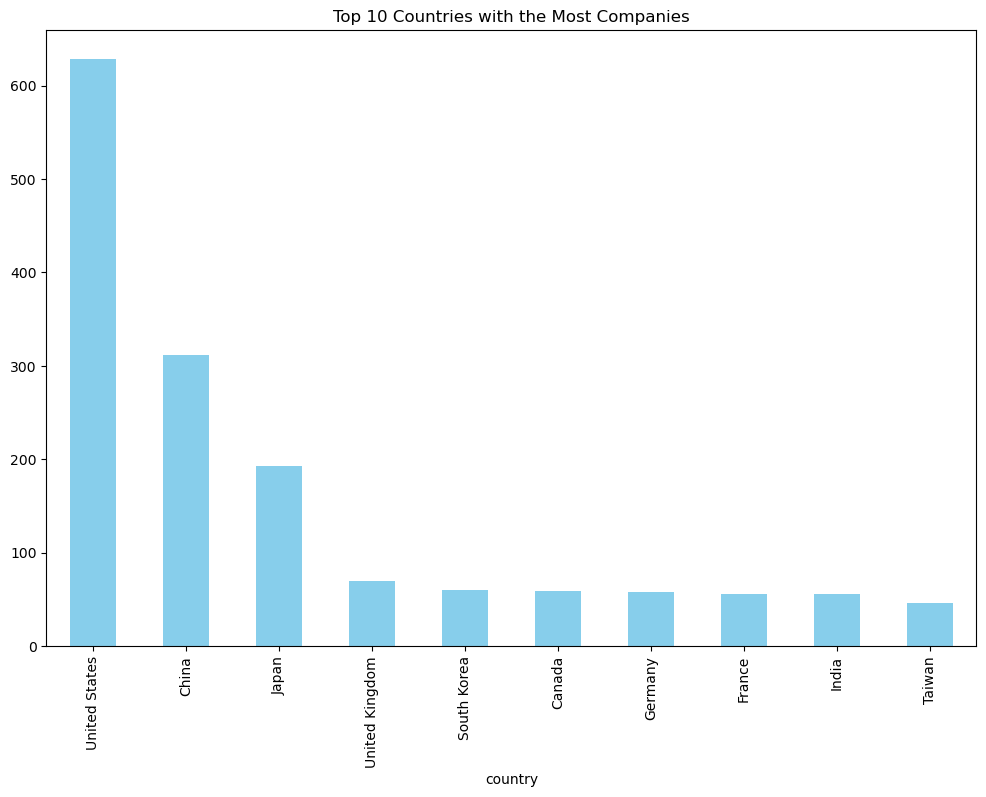

In [107]:
plt.figure(figsize = (12, 8))
df['country'].value_counts().head(10).plot(kind='bar', color = 'skyblue')
plt.title('Top 10 Countries with the Most Companies')
plt.show()

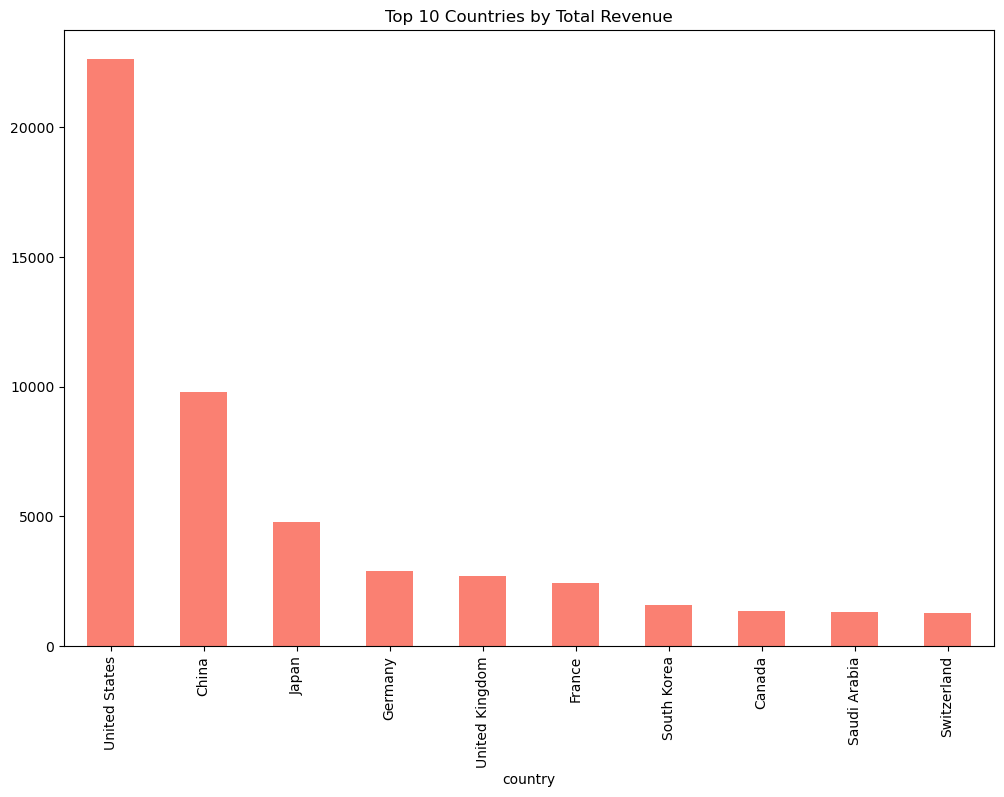

In [111]:
revenue_by_country = df.groupby('country')['revenue'].sum().sort_values(ascending = False).head(10)
plt.figure(figsize = (12, 8))
revenue_by_country.plot(kind = 'bar', color = 'salmon')
plt.title('Top 10 Countries by Total Revenue')
plt.show()

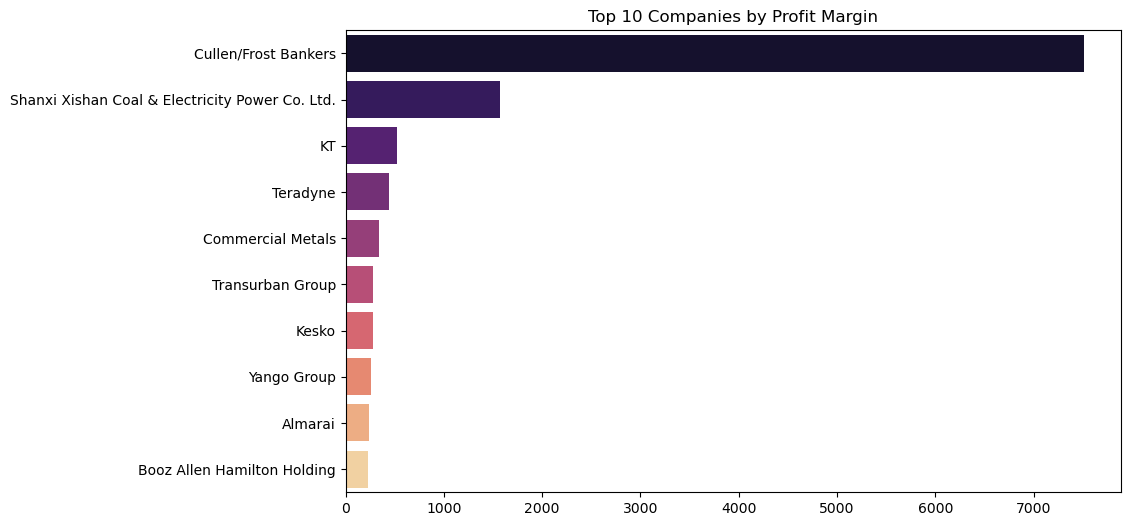

In [117]:
df['profit_margin'] = (df['profits'] / df['revenue']) * 100

top_by_profit_margin = df.sort_values(by = 'profit_margin', ascending = False).head(10)

plt.figure(figsize = (10,6))
sns.barplot(x = 'profit_margin', y = 'organizationName', data = top_by_profit_margin, palette = 'magma', hue = 'organizationName', legend = False)
plt.title('Top 10 Companies by Profit Margin')
plt.xlabel('')
plt.ylabel('')
plt.show()

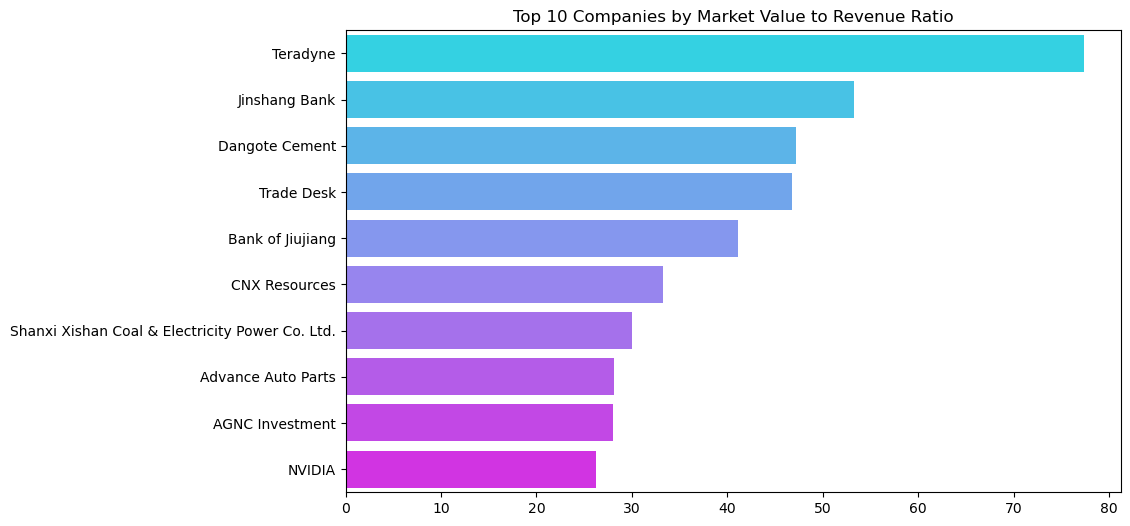

In [121]:
df['mv_to_revenue'] = df['marketValue'] / df['revenue']

top_by_mv_to_revenue = df.sort_values(by = 'mv_to_revenue', ascending = False).head(10)

plt.figure(figsize = (10, 6))
sns.barplot( x ='mv_to_revenue', y = 'organizationName', data = top_by_mv_to_revenue, palette = 'cool', hue = 'organizationName', legend = False)
plt.title('Top 10 Companies by Market Value to Revenue Ratio')
plt.xlabel('')
plt.ylabel('')
plt.show()

In [125]:
country_group = df.groupby('country').agg({
    'revenue' : ['sum', 'mean'],
    'profits' : ['sum', 'mean'],
    'marketValue': ['sum', 'mean']
})

country_group.columns = ['Total Revenue', 'Avg Revenue', 'Total Profits', 'Average Profits', 'Total Market Value', 'Avg market Value']
country_group.sort_values(by = 'Total Revenue', ascending = False).head(10)

,Total Revenue,Avg Revenue,Total Profits,Average Profits,Total Market Value,Avg market Value
country,,,,,,
United States,22607.370,35.998997,2227.5971,3.547129,46220.640,73.599745
China,9797.371,31.401830,944.5986,3.027560,9012.773,28.887093
Japan,4763.371,24.680679,255.2438,1.322507,4402.057,22.808585
Germany,2889.758,49.823414,186.2967,3.212012,2274.449,39.214638
United Kingdom,2695.060,38.500857,310.2338,4.431911,3011.880,43.026857
France,2431.458,43.418893,164.0746,2.929904,3733.660,66.672500
South Korea,1591.313,26.521883,134.0433,2.234055,1664.744,27.745733
Canada,1345.674,22.808034,152.6874,2.587922,1887.647,31.994017
Saudi Arabia,1330.219,73.901056,339.3748,18.854156,4516.340,250.907778
